In [1]:
#import libraries

import random
import bisect
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt




# variable inputs
SEED = None
MAXSEEDSEQ = 100000
u1count = 0
counter = 0

# *** OUTPUT: customer_times[] contains customer arrival times tuple (customer #, arrival time (hr))

## code below

random.seed(SEED)
U1 = [random.uniform(0,1) for i in range(MAXSEEDSEQ)] # contains sequence of random #s U(0,1)
poisson1rate = [0] # stores uniform poisson arrival rates lambda == 1


#define inverse transform functions here

def eq1(x): return (x/0.258)
def eq2(x): return (x+3.95)/1.048
def eq3(x): return ((x+2.2)/.874)
def eq4(x): return ((x+15)/1.626)
def eq5(x): return ((x+7.76)/1.282)
def eq6(x): return ((x+30.72)/2.28)

vhrthin = pd.read_csv("thinningdata.csv")


for i in range(24):
    test = poisson1rate[i] - np.log(U1[counter])
    while (test >= 21.72 and eq6(test) >= 24) or test >= 24: # trim domain/range [0,24) of poisson generated value
        counter += 1
        test = poisson1rate[i] - np.log(U1[counter])  
        
    poisson1rate.append(test)
    counter += 1

poisson1rate.pop(0) # in place
    


#cdf inv equations

'''
eq1: y=.214x + 0.22 inv_range: (0,1.29) [0-5] eq1

eq2: y=1.048x - 3.95 range: 1.29-6.53 [5-10] eq2

eq3: y=0.874x - 2.2 range: 6.53-12.65 [10-17] eq3 

eq4: y=1.626x - 15 range: 12.65-19.156 [17-21] eq4

eq5: y= 1.282x - 7.76 range: 19.156 - 21.72 [21-23] eq5

eq6: y=2.28x - 30.72, range: 21.72-24 [23-24] eq6
'''


flist = [0,eq1,eq2,eq3,eq4,eq5,eq6]

# define right sets inverse domain = f(x) range
places = [
    (1.29, '1'),
    (6.53, '2'),
    (12.65, '3'),
    (19.156, '4'),
    (21.72, '5'),
    (24, '6')
]

places.sort() # list must be sorted
pos_log = []

for to_find in poisson1rate:
    pos = bisect.bisect_right(places, (to_find,))
    pos_log.append(pos)
  #  print ('%s -> %s' % (to_find, places[pos]))

times_list = [(poisson1rate[x],places[pos_log[x]]) for x in range(len(pos_log))]

customer = 1
customer_times = []

for x in range(len(times_list)):
    arrtime = flist[int(times_list[x][1][1])](times_list[x][0])
    customer_times.append((customer, arrtime))
    customer += 1

In [153]:
v2 = np.random.randn(3,2)

np.dot(v2,v2.T)

array([[ 2.70427015, -0.26036469, -0.56012764],
       [-0.26036469,  0.34110086,  0.62883611],
       [-0.56012764,  0.62883611,  1.16185293]])

In [139]:
customer_times ##print customer times (hrs ie 18.60 == 6:36PM)

cus_pts =np.array([[customer_times[x][0],customer_times[x][1]] for x in range(len(customer_times))])

cus_pts

p_pts = np.array([poisson1rate])

p_pts = p_pts.T

p_pts = np.insert(p_pts, 0, 0, axis=1)

p_pts

[(1, 1.1002966441196622),
 (2, 2.5391212248466957),
 (3, 2.8514173777633918),
 (4, 4.147282980117302),
 (5, 4.534781313730922),
 (6, 6.356264096742624),
 (7, 6.609254137133398),
 (8, 8.144246499810317),
 (9, 9.467763787788382),
 (10, 11.517850813421372),
 (11, 11.649945823653315),
 (12, 12.836452077750092),
 (13, 13.451298439940954),
 (14, 14.168956461956386),
 (15, 18.12751821839168),
 (16, 19.324224760237364),
 (17, 19.334013569971262),
 (18, 20.0674699468852),
 (19, 20.328196662558387),
 (20, 20.435565295166985),
 (21, 21.126792952823195),
 (22, 21.690192663273983),
 (23, 21.76167628906961),
 (24, 22.03377375165834)]

array([[ 1.        ,  1.10029664],
       [ 2.        ,  2.53912122],
       [ 3.        ,  2.85141738],
       [ 4.        ,  4.14728298],
       [ 5.        ,  4.53478131],
       [ 6.        ,  6.3562641 ],
       [ 7.        ,  6.60925414],
       [ 8.        ,  8.1442465 ],
       [ 9.        ,  9.46776379],
       [10.        , 11.51785081],
       [11.        , 11.64994582],
       [12.        , 12.83645208],
       [13.        , 13.45129844],
       [14.        , 14.16895646],
       [15.        , 18.12751822],
       [16.        , 19.32422476],
       [17.        , 19.33401357],
       [18.        , 20.06746995],
       [19.        , 20.32819666],
       [20.        , 20.4355653 ],
       [21.        , 21.12679295],
       [22.        , 21.69019266],
       [23.        , 21.76167629],
       [24.        , 22.03377375]])

array([[ 0.        ,  0.28387653],
       [ 0.        ,  0.65509328],
       [ 0.        ,  0.73566568],
       [ 0.        ,  1.06999901],
       [ 0.        ,  1.16997358],
       [ 0.        ,  2.71136477],
       [ 0.        ,  2.97649834],
       [ 0.        ,  4.58517033],
       [ 0.        ,  5.97221645],
       [ 0.        ,  7.86660161],
       [ 0.        ,  7.98205265],
       [ 0.        ,  9.01905912],
       [ 0.        ,  9.55643484],
       [ 0.        , 10.18366795],
       [ 0.        , 14.47534462],
       [ 0.        , 16.42118946],
       [ 0.        , 16.43710606],
       [ 0.        , 17.62970613],
       [ 0.        , 18.05364777],
       [ 0.        , 18.22822917],
       [ 0.        , 19.32454857],
       [ 0.        , 20.04682699],
       [ 0.        , 20.138469  ],
       [ 0.        , 20.48729795]])

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Integrated linear function poisson constant arrival rates $\\lambda$(t)')

Text(0.5, 0, 'Hour in Day (t)')

Text(0, 0.5, 'Integral of Poisson arrival rate(t)')

([<matplotlib.axis.XTick at 0x7fa1c6d06be0>,
 <a list of 24 Text major ticklabel objects>)

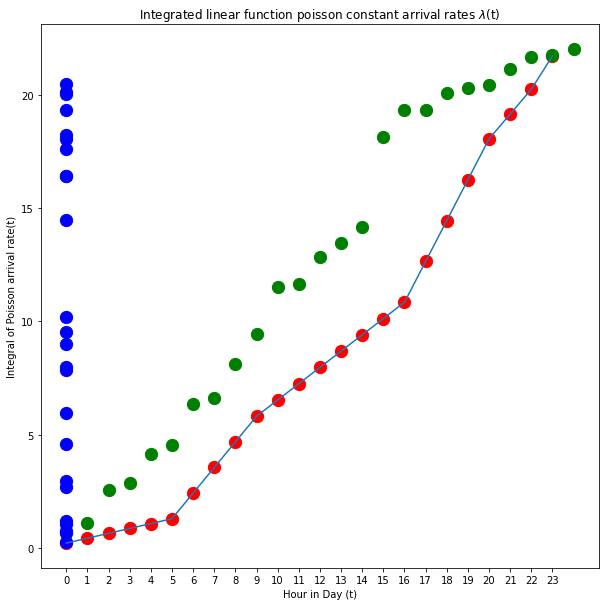

In [140]:
## Graph integral of poisson arrival non-stationary function lamda(t) wrt time t

plt.figure(figsize=(10,10))
plt.plot(vhrthin.index, vhrthin.vcumsum)
plt.title(r'Integrated linear function poisson constant arrival rates $\lambda$(t)')
plt.xlabel('Hour in Day (t)')
plt.ylabel(r'Integral of Poisson arrival rate(t)')
plt.xticks(np.arange(24))
plt.scatter(vhrthin.index,vhrthin.vcumsum,s=150,color='r', zorder=2)
plt.scatter(p_pts[:,0],p_pts[:,1],s=150,color='b', zorder=2)
plt.scatter(cus_pts[:,0],cus_pts[:,1],s=150,color='g', zorder=2)

In [141]:
vhrthin

,hr,poisson,hrtime,perhr,vcumsum
0,0,1.291667,0,0.215278,0.215278
1,1,1.291667,60,0.215278,0.430556
2,2,1.291667,120,0.215278,0.645833
3,3,1.291667,180,0.215278,0.861111
4,4,1.291667,240,0.215278,1.076389
5,5,1.291667,300,0.215278,1.291667
6,6,4.523810,360,1.130952,2.422619
7,7,4.523810,420,1.130952,3.553571
8,8,4.523810,480,1.130952,4.684524
9,9,4.523810,540,1.130952,5.815476


In [3]:
## GET ARRIVAL TIMES FOR NON-CLOSED ARCS IE [START,END) AND (START,END]

dfoos = pd.read_csv("outofsystems.csv")

dfoos

,hour,startinendout_lambda,loglambda,startoutendin_lambda
0,0.0,1.000000,0.000000,2.181818
1,1.0,1.000000,0.000000,1.703704
2,2.0,1.000000,0.000000,1.111111
3,3.0,1.000000,0.000000,1.000000
4,4.0,1.000000,0.000000,1.125000
5,5.0,6.461538,1.865867,2.678571
6,6.0,16.153846,2.782158,6.738462
7,7.0,38.076923,3.639608,8.246154
8,8.0,38.076923,3.639608,15.369231
9,9.0,19.076923,2.948479,8.153846


In [41]:
## arrival times for those that start IN network but end OUTSIDE network [start,end)


## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfoos.startinendout_lambda)


#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = dfoos.loc[dfoos.index == 0, 'startinendout_lambda'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)

cust_ftotal = []
customer_startinendout = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfoos.loc[dfoos.hour == tlambda,'startinendout_lambda'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startinendout.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_startinendout

24.033840173883394

855

,vcount
arrhour,
1.0,1
2.0,1
5.0,9
6.0,19
7.0,23
8.0,33
9.0,25
10.0,7
11.0,5


vcount    303
dtype: int64

[(1, 1.9768575254894114),
 (2, 2.796540014334366),
 (3, 5.01075861729579),
 (4, 5.023332117310288),
 (5, 5.077510386210378),
 (6, 5.321079062741053),
 (7, 5.330489425021255),
 (8, 5.534363681602561),
 (9, 5.6496782477020275),
 (10, 5.966423246567056),
 (11, 5.97171185782647),
 (12, 6.002903723703366),
 (13, 6.095250684481467),
 (14, 6.101092822512615),
 (15, 6.162249894499042),
 (16, 6.250995035435881),
 (17, 6.279120359447528),
 (18, 6.292539669761766),
 (19, 6.296125147194536),
 (20, 6.351343803720827),
 (21, 6.465640165238685),
 (22, 6.631521883660546),
 (23, 6.666891509612787),
 (24, 6.670508577687001),
 (25, 6.7316522638750085),
 (26, 6.744323480516131),
 (27, 6.7576849289568495),
 (28, 6.793660361964781),
 (29, 6.846640382375299),
 (30, 6.961109959666732),
 (31, 7.00140134681039),
 (32, 7.014470911267734),
 (33, 7.05648356114964),
 (34, 7.061337397960213),
 (35, 7.083568841222808),
 (36, 7.093686039004965),
 (37, 7.110109720772048),
 (38, 7.250487325747792),
 (39, 7.2783876522546

In [43]:
## arrival times for those that start OUT network but end INSIDE network (start,end]

## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfoos.startoutendin_lambda)


#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = dfoos.loc[dfoos.index == 0, 'startoutendin_lambda'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)



cust_ftotal = []
customer_startoutendin = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfoos.loc[dfoos.hour == tlambda,'startoutendin_lambda'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startoutendin.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_startoutendin

24.021414212945697

959

,vcount
arrhour,
0.0,2
1.0,2
2.0,1
5.0,2
6.0,14
7.0,9
8.0,8
9.0,7
10.0,8


vcount    242
dtype: int64

[(1, 0.31644973735035875),
 (2, 0.3734858920693392),
 (3, 1.2275275304868896),
 (4, 1.9258161947006402),
 (5, 2.039615322886822),
 (6, 5.408782911830226),
 (7, 5.963804664975823),
 (8, 6.004535459131826),
 (9, 6.179444583390509),
 (10, 6.195674360341883),
 (11, 6.286947403415676),
 (12, 6.426693321820568),
 (13, 6.431256352641172),
 (14, 6.541051597228579),
 (15, 6.573729469580343),
 (16, 6.733471529249163),
 (17, 6.813820148203902),
 (18, 6.817039130795325),
 (19, 6.820248830382188),
 (20, 6.838527542062501),
 (21, 6.96016046078566),
 (22, 7.040028777178436),
 (23, 7.205321835013294),
 (24, 7.43288424600808),
 (25, 7.575031086813874),
 (26, 7.646713974038012),
 (27, 7.7401265974954985),
 (28, 7.76781068709605),
 (29, 7.818953368145684),
 (30, 7.910865681174509),
 (31, 8.040048911970771),
 (32, 8.18225711462504),
 (33, 8.214983294699065),
 (34, 8.466092200476542),
 (35, 8.485243072207911),
 (36, 8.49768440466504),
 (37, 8.5037153714324),
 (38, 8.939327715944684),
 (39, 9.13681604393849